<a href="https://colab.research.google.com/github/Viktoriia-Osmanova/main-repo/blob/main/Python_DS_HW2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Вказуємо посилання на сторінку з таблицею
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

# Отримуємо HTML-код сторінки
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Знаходимо список таблиць за класом
tables = soup.find_all('table', class_='wikitable')

# Вибираємо конкретну таблицю за індексом
target_table_index = 6  # вказуємо індекс таблиці, яку шукаємо (індексуємо з 0)
target_table = tables[target_table_index]

# Використовуємо метод read_html для отримання даних з вибраної таблиці
df = pd.read_html(str(target_table))[0]

# Виводимо вміст обраної таблиці
print(df)


Вивести перші рядки таблиці за допомогою методу head:

In [ ]:
print(df.head())


Визначити кількість рядків та стовпців у датафреймі (атрибут shape):

In [ ]:
print("Кількість рядків та стовпців:", df.shape)


Кількість рядків та стовпців: (28, 9)


Замініть у таблиці значення "—" на значення NaN

In [ ]:
df.replace("—", float("NaN"), inplace=True)
print(df.head())


Визначити типи всіх стовпців за допомогою dataframe.dtypes:

In [ ]:
print("Типи стовпців:")
print(df.dtypes)


Замінити типи нечислових колонок на числові:

In [ ]:
df = df.apply(pd.to_numeric, errors='ignore')


Порахувати, яка частка пропусків міститься в кожній колонці:

In [ ]:
missing_values = df.isnull().sum() / len(df)
print("Частка пропусків в кожній колонці:")
print(missing_values)


Видалити з таблиці дані по всій країні, останній рядок таблиці:

In [ ]:
df.drop(df.tail(1).index, inplace=True)
print(df)


Замінити відсутні дані в стовпцях середніми значеннями цих стовпців:

In [ ]:
import pandas as pd

# Отримуємо список числових стовпців
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Замінюємо відсутні дані в числових стовпцях середніми значеннями
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
print(df)


Отримати список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні:

In [ ]:
import numpy as np

# Замінюємо неправильні значення на NaN
df['2019'] = pd.to_numeric(df['2019'], errors='coerce')

# Знаходимо регіони з вищим рівнем народжуваності у 2019 році за середнім по Україні
higher_birth_rate_regions = df[df['2019'] > df['2019'].mean()].index.tolist()

print("Список регіонів з вищим рівнем народжуваності у 2019 році за середнім по Україні:")
print(higher_birth_rate_regions)


Список регіонів з вищим рівнем народжуваності у 2019 році за середнім по Україні:
[2, 6, 8, 12, 14, 16, 20, 23, 25]


В якому регіоні була найвища народжуваність у 2014 році:

In [ ]:
# Замінюємо неправильні значення на NaN
df['2014'] = pd.to_numeric(df['2014'], errors='coerce')

# Знаходимо індекс максимального значення у стовпці '2014'
highest_birth_rate_region_2014 = df['2014'].idxmax()

print("Найвища народжуваність у 2014 році була в регіоні:", highest_birth_rate_region_2014)


Найвища народжуваність у 2014 році була в регіоні: 16


Побудувати стовпчикову діаграму народжуваності по регіонах у 2019 році:

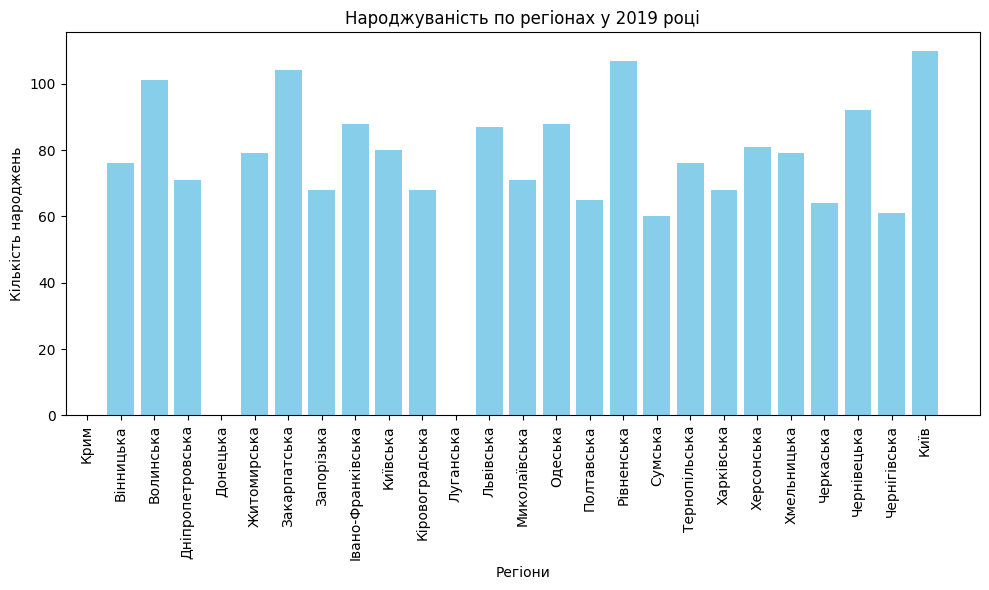

In [ ]:
import matplotlib.pyplot as plt

# Вибираємо дані для побудови діаграми
data = df['2019']

# Вибираємо назви регіонів для відображення на діаграмі
regions = df['Регіон']

# Побудова стовпчикової діаграми
plt.figure(figsize=(10, 6))
plt.bar(regions, data, color='skyblue')
plt.xlabel('Регіони')
plt.ylabel('Кількість народжень')
plt.title('Народжуваність по регіонах у 2019 році')
plt.xticks(rotation=90)  # Повертаємо підписи регіонів на 90 градусів для зручності
plt.tight_layout()  # Автоматично налаштовує розміри діаграми, щоб вона вмістилася повністю
plt.show()
